In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [59]:
### Importation de données

data = data = pd.read_csv("IndiaFilm.csv", encoding="latin-1")
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [60]:
# Dim data
data.shape

(15509, 10)

In [61]:
# Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [62]:
# Data Duplication

data.duplicated().sum()

6

In [63]:
# Drop Data Duplicate

data.drop_duplicates(inplace=True)

In [64]:
data.duplicated().sum()

0

In [65]:
# Data column

data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [66]:
# NAN
data.isna().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

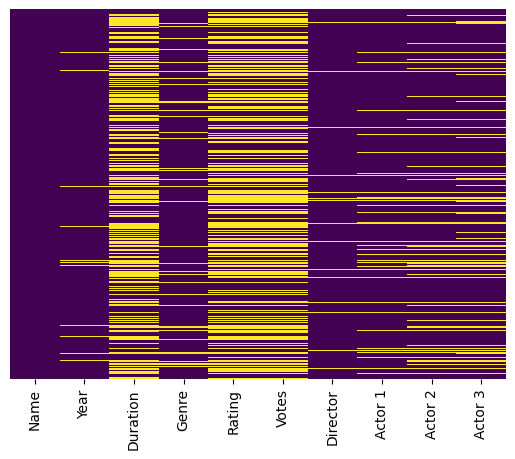

In [67]:
# Visual NAN

sns.heatmap(data.isna(), cbar=False, cmap="viridis", yticklabels=False);

In [68]:
# Change variable type **Year**

data["Year"] = data["Year"].str.strip("()").astype(float)
data["Year"].dtype

dtype('float64')

In [69]:
# Change type of variable ** Duration**

data["Duration"] = data["Duration"].str.extract("(\d+)").astype(float)
data["Duration"].dtype

dtype('float64')

In [70]:
data['Votes'] = data['Votes'].str.extract('(\d+)').astype(float)
data['Votes'].dtype

dtype('float64')

In [71]:
data.dtypes

Name         object
Year        float64
Duration    float64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [72]:
# Columns numerique
num_cols = data.select_dtypes(include=np.number).columns
num_cols

Index(['Year', 'Duration', 'Rating', 'Votes'], dtype='object')

In [73]:
# Columns Objet
cat_cols = data.select_dtypes(include="object").columns
cat_cols

Index(['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object')

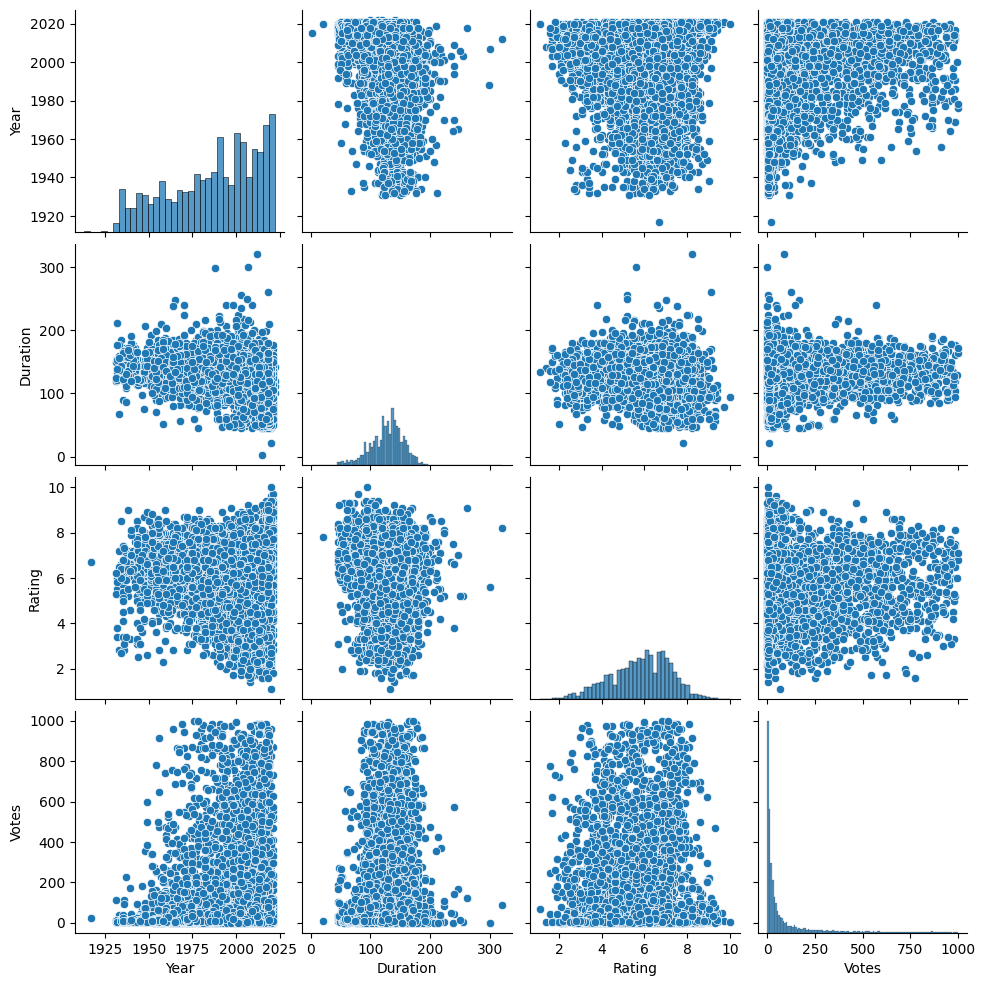

In [74]:
sns.pairplot(data);

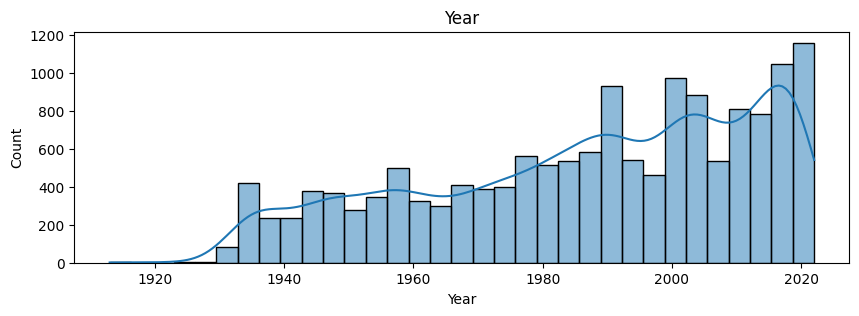

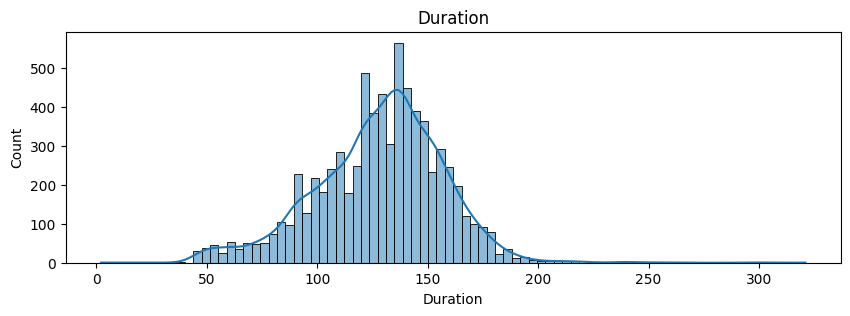

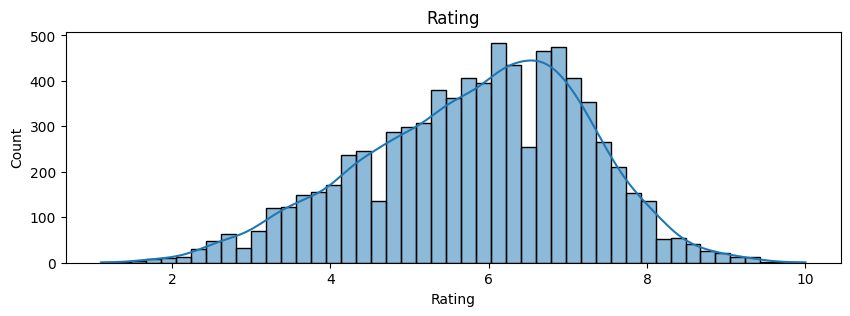

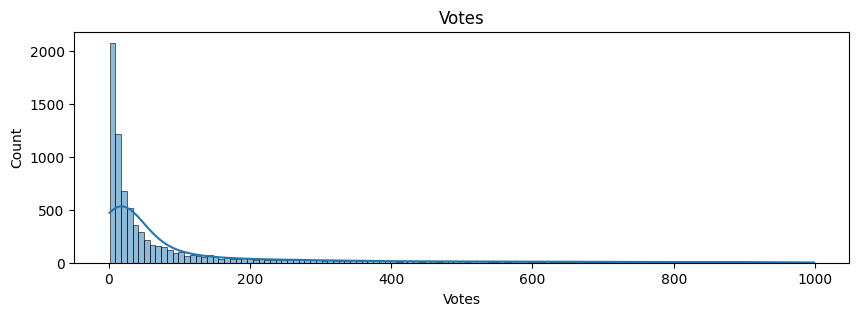

In [75]:
# Diagramme Value numerique
for col in num_cols:
  plt.figure(figsize=(10, 3))
  plt.title(col)
  sns.histplot(x=data[col], kde=True)
  plt.show

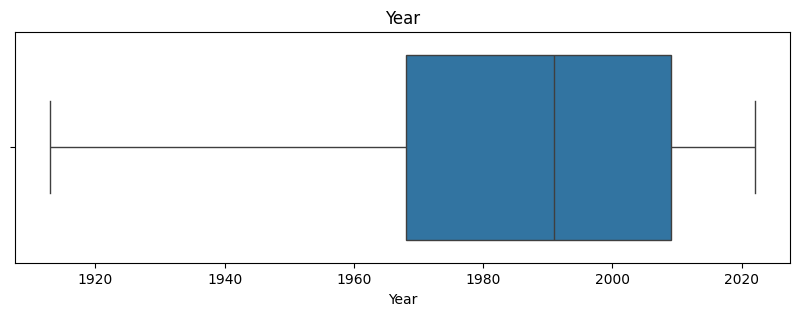

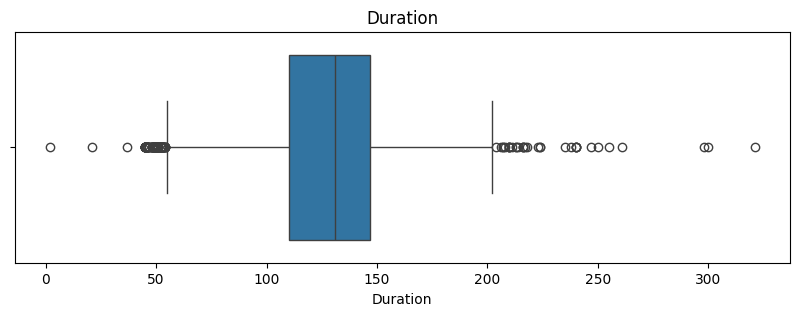

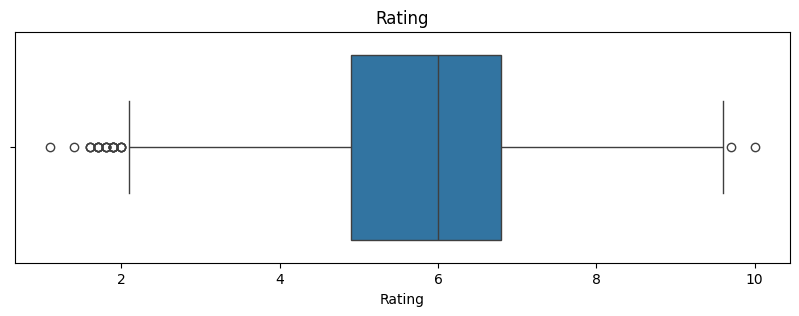

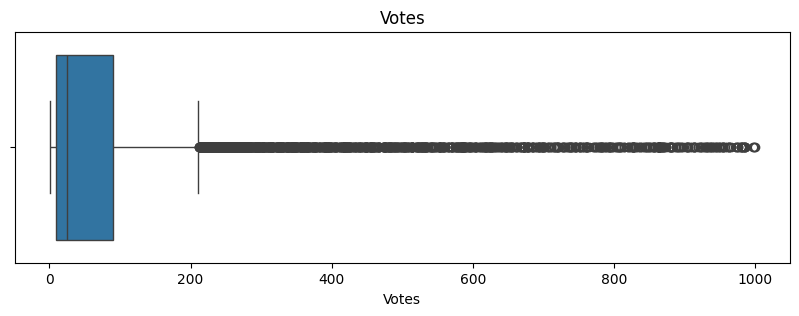

In [76]:
# Analyse one by one value numerique
for col in num_cols:
  plt.figure(figsize=(10, 3))
  plt.title(col)
  sns.boxplot(x=data[col])
  plt.show

In [77]:
for col in cat_cols:
  print('----------------------------------------------')
  print('')
  print('Number value unique in data type objet')
  print('')
  print(col)
  print('----------------------------------------------')
  print('')
  print(data[col].value_counts())





----------------------------------------------

Number value unique in data type objet

Name
----------------------------------------------

Name
Anjaam                7
Mamta                 7
Zindagi               6
Toofan                5
Shikari               5
                     ..
Hamari Yaad Aayegi    1
Hameer Hath           1
Hamen Bhi Jeene Do    1
Hamen Khelne Do       1
Zulm-O-Sitam          1
Name: count, Length: 13838, dtype: int64
----------------------------------------------

Number value unique in data type objet

Genre
----------------------------------------------

Genre
Drama                         2779
Action                        1288
Thriller                       777
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Len

In [78]:
data['Genre'] = data['Genre'].str.split(' ').str[0]
data['Genre'] = data['Genre'].str.split(',').str[0]
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,Drama,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,Comedy,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [79]:
data['Director'] = data['Director'].str.split(' ').str[1]

In [80]:
data['Actor 1'] = data['Actor 1'].str.split(' ').str[0]
data['Actor 2'] = data['Actor 2'].str.split(' ').str[0]
data['Actor 3'] = data['Actor 3'].str.split(' ').str[0]

In [81]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,Randhawa,Manmauji,Birbal,Rajendra
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Bakshi,Rasika,Vivek,Arvind
2,#Homecoming,2021.0,90.0,Drama,NaN,NaN,Majumdar,Sayani,Plabita,Roy
3,#Yaaram,2019.0,110.0,Comedy,4.4,35.0,Khan,Prateik,Ishita,Siddhant
4,...And Once Again,2010.0,105.0,Drama,NaN,NaN,Palekar,Rajat,Rituparna,Antara


In [82]:
# Somme index in Data type Object
col = ['Genre','Actor 1', 'Actor 2', 'Actor 3']
data[col].nunique().reset_index(name='Nombre')

,index,Nombre
0,Genre,21
1,Actor 1,2780
2,Actor 2,2891
3,Actor 3,2865


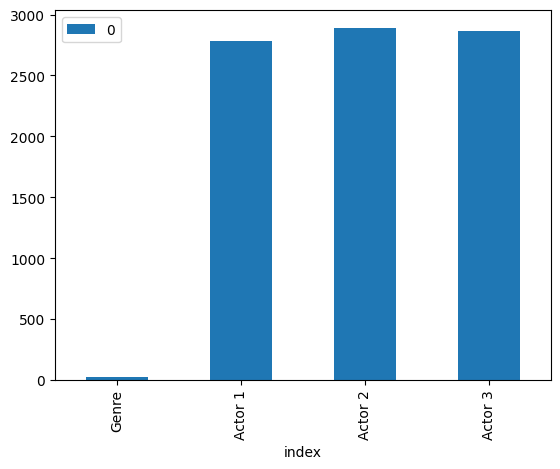

In [83]:
# Effectif Objet in data type Objet

data[col].nunique().reset_index().plot.bar(x='index', y=0);

<Axes: >

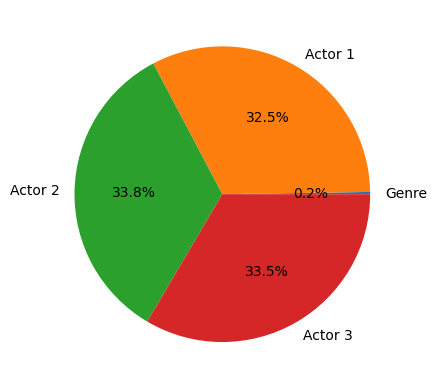

In [84]:
# Power

data[col].nunique().plot.pie(autopct='%1.1f%%')

In [85]:
data.drop(['Name', 'Year', 'Duration'], axis=1, inplace=True)

In [86]:
data.describe()

,Rating,Votes
count,7919.000000,7920.000000
mean,5.841621,101.663258
std,1.381777,181.816665
min,1.100000,1.000000
25%,4.900000,9.000000
50%,6.000000,25.000000
75%,6.800000,90.000000
max,10.000000,999.000000


In [87]:
# Supprimer les lignes où la note est manquante
data.dropna(inplace=True)

In [88]:
data['Rating'] = data['Rating'].astype(int)
data['Votes'] = data['Votes'].astype(int)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7174 entries, 1 to 15508
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Genre     7174 non-null   object
 1   Rating    7174 non-null   int64 
 2   Votes     7174 non-null   int64 
 3   Director  7174 non-null   object
 4   Actor 1   7174 non-null   object
 5   Actor 2   7174 non-null   object
 6   Actor 3   7174 non-null   object
dtypes: int64(2), object(5)
memory usage: 448.4+ KB


In [90]:
# prompt: supprimer les outillier dans Ratting et vote

def remove_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df_filtered

data = remove_outliers(data, 'Rating')
data = remove_outliers(data, 'Votes')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6141 entries, 1 to 15508
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Genre     6141 non-null   object
 1   Rating    6141 non-null   int64 
 2   Votes     6141 non-null   int64 
 3   Director  6141 non-null   object
 4   Actor 1   6141 non-null   object
 5   Actor 2   6141 non-null   object
 6   Actor 3   6141 non-null   object
dtypes: int64(2), object(5)
memory usage: 383.8+ KB


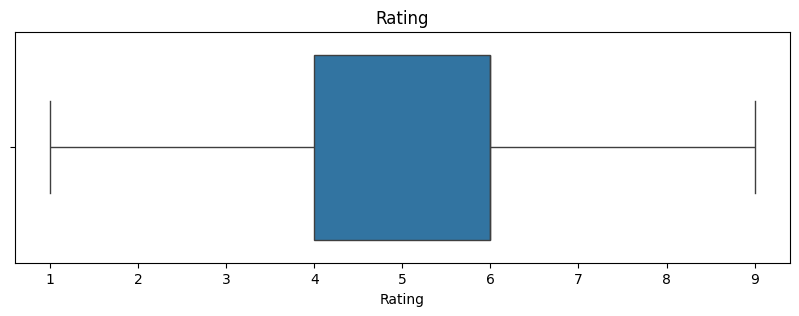

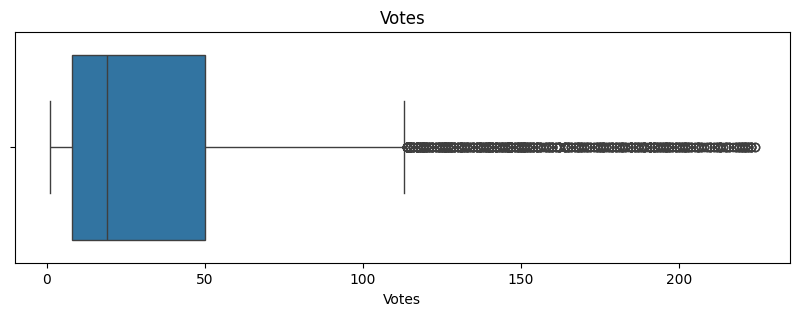

In [91]:
# Analyse one by one value numerique
num_cols = data.select_dtypes(include=np.number).columns
for col in num_cols:
  plt.figure(figsize=(10, 3))
  plt.title(col)
  sns.boxplot(x=data[col])
  plt.show

In [92]:

data = remove_outliers(data, 'Rating')
data = remove_outliers(data, 'Votes')

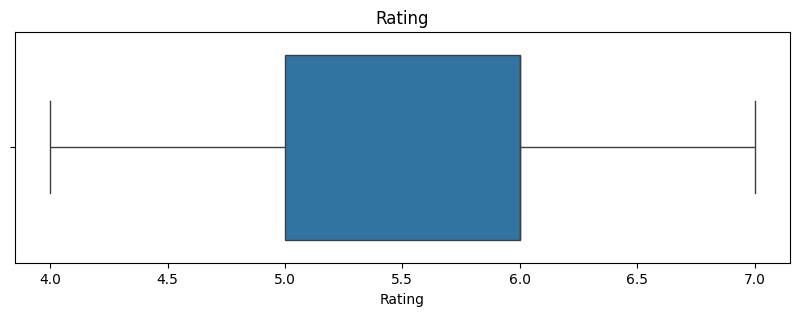

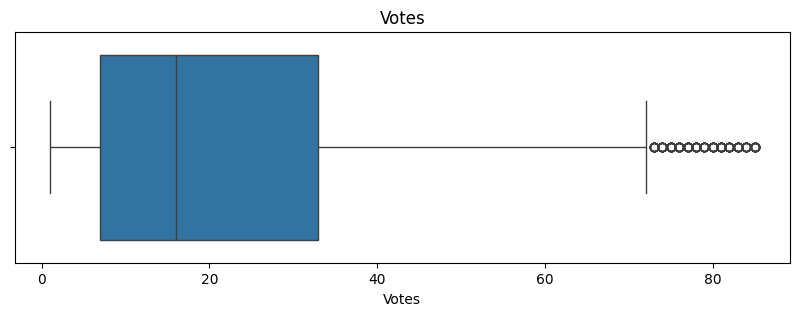

In [93]:
data = remove_outliers(data, 'Rating')
data = remove_outliers(data, 'Votes')
# Analyse one by one value numerique
num_cols = data.select_dtypes(include=np.number).columns
for col in num_cols:
  plt.figure(figsize=(10, 3))
  plt.title(col)
  sns.boxplot(x=data[col])
  plt.show

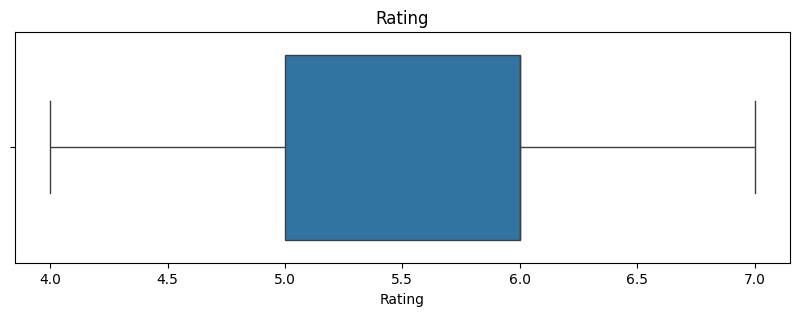

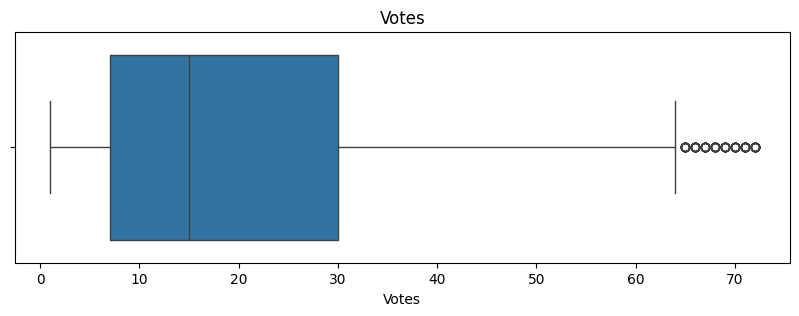

In [94]:
data = remove_outliers(data, 'Rating')
data = remove_outliers(data, 'Votes')
# Analyse one by one value numerique
num_cols = data.select_dtypes(include=np.number).columns
for col in num_cols:
  plt.figure(figsize=(10, 3))
  plt.title(col)
  sns.boxplot(x=data[col])
  plt.show

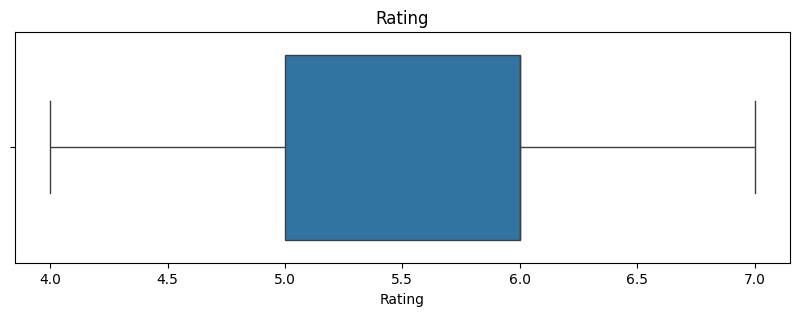

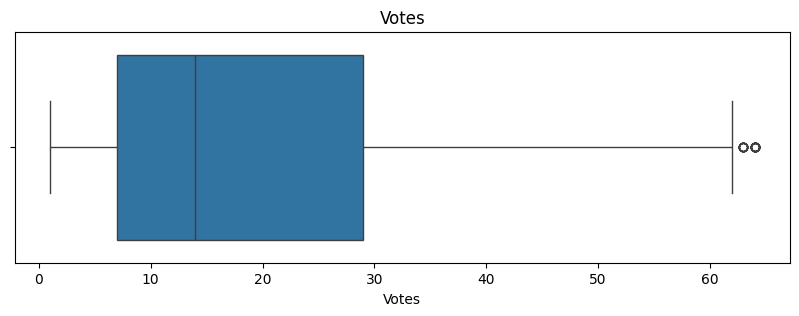

In [95]:
data = remove_outliers(data, 'Rating')
data = remove_outliers(data, 'Votes')
# Analyse one by one value numerique
num_cols = data.select_dtypes(include=np.number).columns
for col in num_cols:
  plt.figure(figsize=(10, 3))
  plt.title(col)
  sns.boxplot(x=data[col])
  plt.show

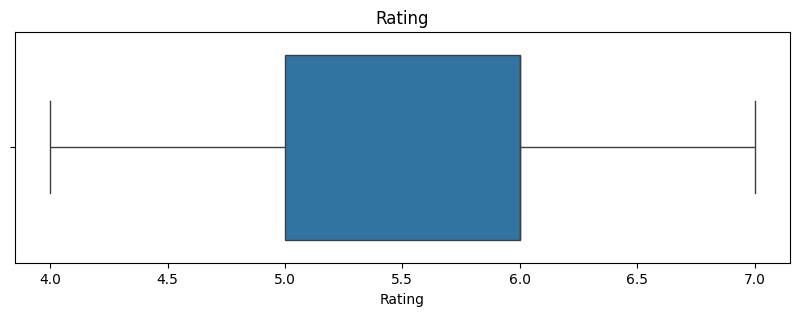

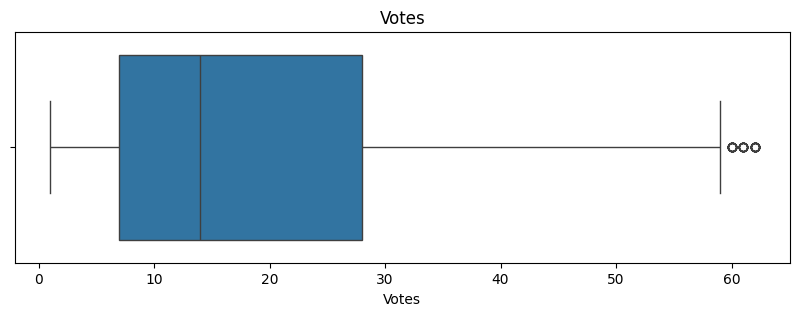

In [96]:
data = remove_outliers(data, 'Rating')
data = remove_outliers(data, 'Votes')
# Analyse one by one value numerique
num_cols = data.select_dtypes(include=np.number).columns
for col in num_cols:
  plt.figure(figsize=(10, 3))
  plt.title(col)
  sns.boxplot(x=data[col])
  plt.show

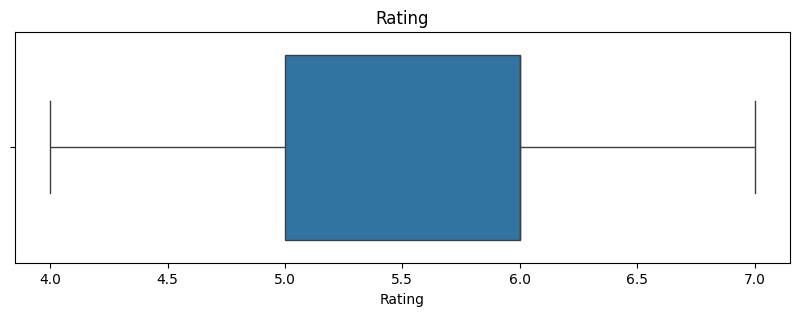

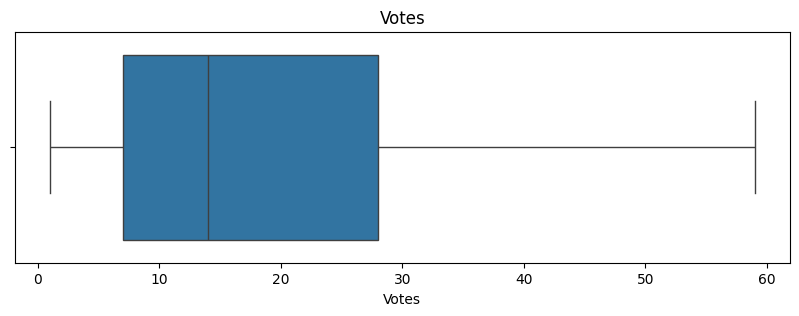

In [97]:
data = remove_outliers(data, 'Rating')
data = remove_outliers(data, 'Votes')
# Analyse one by one value numerique
num_cols = data.select_dtypes(include=np.number).columns
for col in num_cols:
  plt.figure(figsize=(10, 3))
  plt.title(col)
  sns.boxplot(x=data[col])
  plt.show

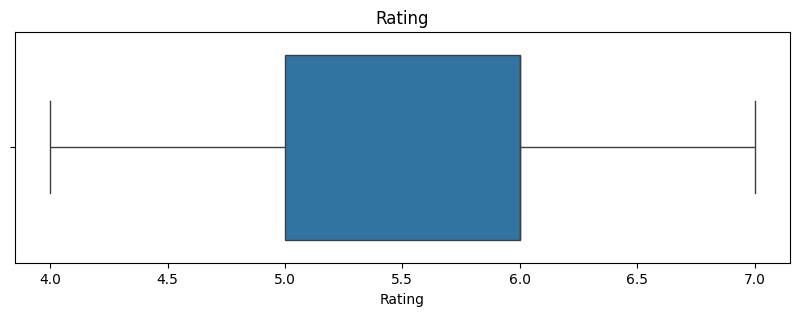

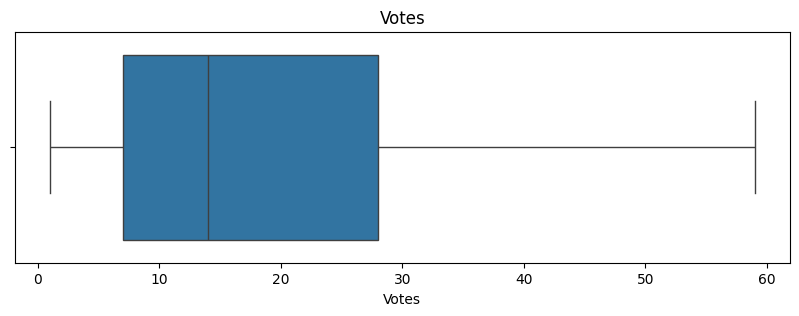

In [98]:
data = remove_outliers(data, 'Rating')
data = remove_outliers(data, 'Votes')
# Analyse one by one value numerique
num_cols = data.select_dtypes(include=np.number).columns
for col in num_cols:
  plt.figure(figsize=(10, 3))
  plt.title(col)
  sns.boxplot(x=data[col])
  plt.show

In [99]:
data.head()

,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Drama,7,8,Bakshi,Rasika,Vivek,Arvind
3,Comedy,4,35,Khan,Prateik,Ishita,Siddhant
6,Drama,7,1,Sircar,Jimmy,Minissha,Yashpal
9,Action,4,11,Bhaskar,Augustine,Fathima,Byon
10,Drama,6,17,Ambat,Rati,Gulshan,Atul


In [100]:
data.to_csv('data_clean.csv', index=False)

In [101]:
data_clean = pd.read_csv('data_clean.csv')
data_clean.head()

,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Drama,7,8,Bakshi,Rasika,Vivek,Arvind
1,Comedy,4,35,Khan,Prateik,Ishita,Siddhant
2,Drama,7,1,Sircar,Jimmy,Minissha,Yashpal
3,Action,4,11,Bhaskar,Augustine,Fathima,Byon
4,Drama,6,17,Ambat,Rati,Gulshan,Atul


In [102]:
data_clean.tail()

,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
4148,Action,5,33,Mitra,Navin,Rekha,Urmila
4149,Biography,6,1,Benegal,Karisma,Rekha,Manoj
4150,Action,5,44,Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
4151,Action,4,11,Shah,Naseeruddin,Sumeet,Suparna
4152,Action,6,20,Bokadia,Dharmendra,Jaya,Arjun


In [103]:
data.describe()

,Rating,Votes
count,4153.000000,4153.000000
mean,5.543703,18.487599
std,1.000038,15.147028
min,4.000000,1.000000
25%,5.000000,7.000000
50%,6.000000,14.000000
75%,6.000000,28.000000
max,7.000000,59.000000


In [104]:

# Définir les colonnes catégorielles
categorical_cols = ['Genre', 'Votes','Director', 'Actor 1', 'Actor 2', 'Actor 3']


In [105]:
# Créer le preprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

In [106]:
# Sélectionner les colonnes pertinentes
features = ['Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = data[features]
y = data['Rating']

In [107]:
# Diviser les données en variables d'entrée et variable cible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [108]:
modelL = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
# Entraîner le modèle
modelL.fit(X_train, y_train)
# Prédire les résultats
y_pred = modelL.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')
print(f'MAE: {mae}')

MSE: 7.363799862755942
R²: -6.478694079912414
MAE: 1.8973556164735632


In [109]:
modelR = Pipeline([
    ('preprocess', preprocessor),
    ('modelR', Ridge())
])


# Entraîner le modèle
modelR.fit(X_train, y_train)

# Prédire les résultats
y_pred = modelR.predict(X_test)

# Calculer les métriques
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')


RMSE: 1.0301707610892772
MAE: 0.8415548909430628
R²: -0.07781005451909628


In [110]:

modelLa = Pipeline([
    ('preprocess', preprocessor),
    ('modelLa', Lasso())
])

# Entraîner le modèle
modelLa.fit(X_train, y_train)

# Prédire les résultats
y_pred = modelLa.predict(X_test)

# Calculer les métriques
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')


RMSE: 0.9922895952311976
MAE: 0.8648991408333461
R²: -1.5360383027740454e-06


In [111]:

modelRfr = Pipeline([
    ('preprocess', preprocessor),
    ('modelRfr', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entraîner le modèle
modelRfr.fit(X_train, y_train)

# Prédire les résultats
y_pred = modelRfr.predict(X_test)

# Calculer les métriques
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')


RMSE: 0.9963677716897982
MAE: 0.8010589651022865
R²: -0.008238170047297544


In [112]:

modelGbr = Pipeline([
    ('preprocess', preprocessor),
    ('modelGbr', GradientBoostingRegressor(random_state=42))
])

# Entraîner le modèle
modelGbr.fit(X_train, y_train)

# Prédire les résultats
y_pred = modelGbr.predict(X_test)

# Calculer les métriques
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

RMSE: 0.9574427552339108
MAE: 0.8100783982035358
R²: 0.06900054533465583


In [113]:

modelSvr = Pipeline([
    ('preprocess', preprocessor),
    ('modelSvr', SVR(kernel='rbf'))
])

# Entraîner le modèle
modelSvr.fit(X_train, y_train)

# Prédire les résultats
y_pred = modelSvr.predict(X_test)

# Calculer les métriques
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

RMSE: 0.9467589102350736
MAE: 0.7775339367038766
R²: 0.08966216254810133


In [114]:
# Meilleur modele

model_end = modelSvr
print(model_end)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Votes', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('modelSvr', SVR())])


In [115]:
import joblib
joblib.dump(model_end, 'model_Prediction_Films_Inde.pkl')

['model_Prediction_Films_Inde.pkl']